In [119]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

In [168]:
train_df = pd.read_csv("working_data/trial_promo_training_original.csv")
test_df = pd.read_csv("working_data/trial_promo_testing.csv")

### Data balancing using equal classes strategy

In [169]:
should_balance = True

In [170]:
number_of_nones = train_df[train_df["decision"] == "None"].shape[0]
nones_df = train_df[train_df["decision"] == "None"]
productA_df = train_df[train_df["decision"] == "A"]
productB_df = train_df[train_df["decision"] == "B"]
print("Number of None's: " + str(nones_df.shape[0]))
print("Increase product A's by: " + str(number_of_nones - productA_df.shape[0]))
print("Increase product B's by: " + str(number_of_nones - productB_df.shape[0]))
print("Number of product A's: " + str(productA_df.shape[0]))
print("Number of product B's: " + str(productB_df.shape[0]))
times_to_increase_productA_df = (number_of_nones - productA_df.shape[0])//productA_df.shape[0]
times_to_increase_productB_df = (number_of_nones - productB_df.shape[0])//productB_df.shape[0]

Number of None's: 621
Increase product A's by: 521
Increase product B's by: 592
Number of product A's: 100
Number of product B's: 29


In [171]:
if should_balance:
    repeated_product_A = [productA_df] * times_to_increase_productA_df
    repeated_product_B = [productB_df] * times_to_increase_productB_df
    repeated_product_A_df = pd.concat(repeated_product_A)
    repeated_product_B_df = pd.concat(repeated_product_B)
    dfs_to_concat = [nones_df, repeated_product_A_df, repeated_product_B_df]
    train_df = pd.concat(dfs_to_concat)
    train_df = train_df.sample(frac=1).reset_index(drop=True)
    print("New # rows: " + str(train_df.shape[0]))
    train_df.head()
else:
    print("Training data will not be balanced")

New # rows: 1701


In [172]:
features_to_scale = ["age", "income", "avbal", "avtrans"]
columns_to_drop_for_nn = ["sexNum", "mstatusNum", "occupationNum", "educationNum", "childrenNum"]
min_max_scaler = preprocessing.MinMaxScaler()
train_df[features_to_scale] = min_max_scaler.fit_transform(train_df[features_to_scale])

train_df.head()

,age,income,avbal,avtrans,decision,sexNum,mstatusNum,occupationNum,educationNum,childrenNum,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.317316,0.015247,0.196470,0.139730,A,0,1,3,2,2,...,0,0,0,1,0,0,0,1,0,0
1,0.144012,0.299476,0.148188,0.256508,B,0,2,0,3,0,...,0,0,0,0,1,1,0,0,0,0
2,0.651948,0.185311,0.281522,0.103797,A,0,1,2,3,0,...,0,0,0,0,1,1,0,0,0,0
3,0.081097,0.457065,0.341486,0.334342,B,0,2,4,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0.280808,0.055856,0.206200,0.090500,None,1,1,3,2,1,...,0,0,0,1,0,0,1,0,0,0


In [173]:
X_train = train_df.loc[:, train_df.columns != "decision"]
X_train = X_train.drop(columns_to_drop_for_nn, axis=1)
y_train = train_df["decision"].replace("A", 0).replace("B", 1).replace("None", 2)
X_train.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.317316,0.015247,0.196470,0.139730,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0.144012,0.299476,0.148188,0.256508,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
2,0.651948,0.185311,0.281522,0.103797,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0.081097,0.457065,0.341486,0.334342,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0.280808,0.055856,0.206200,0.090500,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [174]:
y_train.head()

0    0
1    1
2    0
3    1
4    2
Name: decision, dtype: int64

In [175]:
test_df[features_to_scale] = min_max_scaler.transform(test_df[features_to_scale])
test_df.head()

X_test = test_df.loc[:, test_df.columns != "decision"]
X_test = X_test.drop(columns_to_drop_for_nn, axis=1)
y_test = test_df["decision"].replace("A", 0).replace("B", 1).replace("None", 2)
X_test.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.704906,0.080506,0.063522,0.100964,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
1,0.139105,0.088530,0.232708,0.122881,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0.514719,0.300505,0.338760,0.089771,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.148052,0.346235,0.180242,0.390105,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,0.425830,0.556900,0.231039,0.484708,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


# Build different models

### Neural network

In [128]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Training accuracy

In [129]:
clf = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 8, 4), random_state= 42)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

[[495   0   5]
 [  0 580   0]
 [183  96 342]]
0.8330393885949442


### Testing accuracy

In [130]:
y_test_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2]))
print(accuracy_score(y_test, y_test_pred))

[[ 29   0   4]
 [  0   8   2]
 [ 61  33 113]]
0.6


## Random forest classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier
columns_for_rf = ["age", "income", "avbal", "avtrans", "sexNum", "mstatusNum", "occupationNum", "educationNum", "childrenNum"]
X_train_rf = train_df[columns_for_rf]
y_train_rf = train_df["decision"].replace("A", 0).replace("B", 1).replace("None", 2)

X_train_rf.head()

,age,income,avbal,avtrans,sexNum,mstatusNum,occupationNum,educationNum,childrenNum
0,0.462915,0.115365,0.357833,0.187048,0,1,4,3,2
1,0.192785,0.114112,0.099337,0.107532,1,1,4,2,0
2,0.034776,0.372368,0.364107,0.644342,1,2,5,0,0
3,0.336652,0.263500,0.380291,0.201626,0,0,4,3,0
4,0.168254,0.479548,0.435081,0.243890,1,0,3,3,1


In [136]:
clf = RandomForestClassifier(max_depth=2, random_state=42, n_estimators=1000)
clf.fit(X_train_rf, y_train_rf)

y_train_pred = clf.predict(X_train_rf)
print(y_train_pred)

[0 2 1 ... 1 0 0]


In [137]:
print(confusion_matrix(y_train_rf, y_train_pred))
print(accuracy_score(y_train_rf, y_train_pred))

[[420  20  60]
 [  0 580   0]
 [159 124 338]]
0.7865961199294532


In [138]:
X_test_rf = test_df[columns_for_rf]
y_test_rf = test_df["decision"].replace("A", 0).replace("B", 1).replace("None", 2)

y_test_pred = clf.predict(X_test_rf)
print(confusion_matrix(y_test_rf, y_test_pred))
print(accuracy_score(y_test_rf, y_test_pred))

[[ 28   2   3]
 [  0  10   0]
 [ 45  40 122]]
0.64


### Build a neural network using Keras

In [221]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
# fix random seed for reproducibility
np.random.seed(42)

In [222]:
X_train.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.317316,0.015247,0.196470,0.139730,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0.144012,0.299476,0.148188,0.256508,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
2,0.651948,0.185311,0.281522,0.103797,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0.081097,0.457065,0.341486,0.334342,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0.280808,0.055856,0.206200,0.090500,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [232]:
# create model
num_features = X_train.shape[1]
model = Sequential()
model.add(Dense(num_features, input_dim=num_features, activation='relu', init='uniform'))
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(6, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

G:\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(28, input_dim=28, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [233]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [234]:
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=3)

In [235]:
history = model.fit(X_train, y_train_one_hot, epochs=200, batch_size=100, verbose=0, validation_split=0.05)

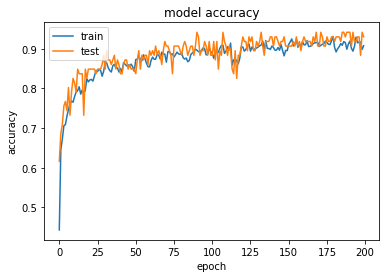

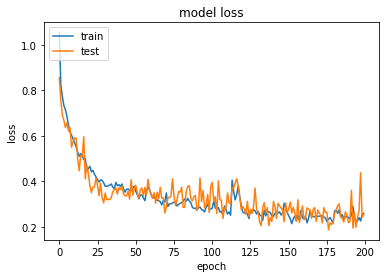

In [236]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Training confusion matrix and accuracy

In [237]:
keras_nn_predictions_train = model.predict(X_train)
keras_nn_predictions_train = np.argmax(keras_nn_predictions_train, axis=1)
print(confusion_matrix(y_train, keras_nn_predictions_train, labels=[0, 1, 2]))
print(accuracy_score(y_train, keras_nn_predictions_train))

[[490   0  10]
 [  0 580   0]
 [ 28  20 573]]
0.9659024103468548


### Testing confusion matrix and accuracy

In [238]:
X_test.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.704906,0.080506,0.063522,0.100964,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
1,0.139105,0.088530,0.232708,0.122881,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0.514719,0.300505,0.338760,0.089771,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.148052,0.346235,0.180242,0.390105,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,0.425830,0.556900,0.231039,0.484708,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [239]:
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes=3)

# evaluate the model
scores = model.evaluate(X_test, y_test_one_hot)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

250/250 [==============================] - 0s 72us/step

acc: 76.40%


In [240]:
keras_nn_predictions = model.predict(X_test)
len(keras_nn_predictions)
keras_nn_predictions = np.argmax(keras_nn_predictions, axis=1)
len(keras_nn_predictions)
keras_nn_predictions
print(confusion_matrix(y_test, keras_nn_predictions, labels=[0, 1, 2]))
print(accuracy_score(y_test, keras_nn_predictions))

[[ 18   0  15]
 [  0   5   5]
 [ 28  11 168]]
0.764


# Save the best model for later usage

In [241]:
model.save('models/NN_76_40.h5')

### Load the model and check

In [244]:
from keras.models import load_model
model = load_model('models/NN_76_40.h5')
keras_nn_predictions = model.predict(X_test)
keras_nn_predictions = np.argmax(keras_nn_predictions, axis=1)
print(confusion_matrix(y_test, keras_nn_predictions, labels=[0, 1, 2]))
print(accuracy_score(y_test, keras_nn_predictions))

[[ 18   0  15]
 [  0   5   5]
 [ 28  11 168]]
0.764
